In [14]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import xml.etree.ElementTree as ET
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

from sentence_transformers import SentenceTransformer, util
import torch
import seaborn as sns

import numpy as np

import utils as u
import os

plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times New Roman"],
        "text.usetex": True  
    })


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
root_path = "./ARCHIVES"

In [3]:
df = pd.read_csv(os.path.join(root_path,"FP1_9_v3.csv"), low_memory = False)

In [153]:
df_clean = df.dropna(subset=["euroSciVocPath"])

In [154]:
for col in df.columns :
    print(col,":", df.iloc[0][col])

Unnamed: 0.3 : 0
Unnamed: 0.2 : 0
Unnamed: 0.1 : 0
Unnamed: 0 : 0
id : RI1B0234
acronym : nan
status : nan
title : CREATION OF A POWERFUL MANAGEMENT AND CAD SOFTWARE OPTIMIZING THE POTENTIAL OF A SMALL SHIPBUILDING FIRM
startDate : 1988-08-01
endDate : 1992-09-30
totalCost : nan
ecMaxContribution : nan
legalBasis : FP1-BRITE
topics : nan
ecSignatureDate : nan
frameworkProgramme : FP1
masterCall : nan
subCall : nan
fundingScheme : CSC
nature : nan
objective : This project developed a ship design which uses computer-aided design and engineering (CAD/CAE), to bring increased flexibility, productivity and design precision to small and medium-sized ship design companies. The system, called LUNAIS, offers software features which give smaller shipbuilders the possibility to reduce variations in the ship design process, and to automate complex engineering and measurement tasks which traditionally were done manually. The LUNAIS software allows small and medium-sized ship design companies to: - 

In [170]:
df["type_de_projet"].value_counts()

type_de_projet
Health              18913
Environment         18150
Industrie           17422
Fundamental         16512
Digital_Economy     12386
Energy              10196
Food_Agriculture     7282
Space                6925
Transport            6325
Society              5353
Name: count, dtype: int64

---

<Axes: title={'center': 'Distribution des scores climat'}, ylabel='Frequency'>

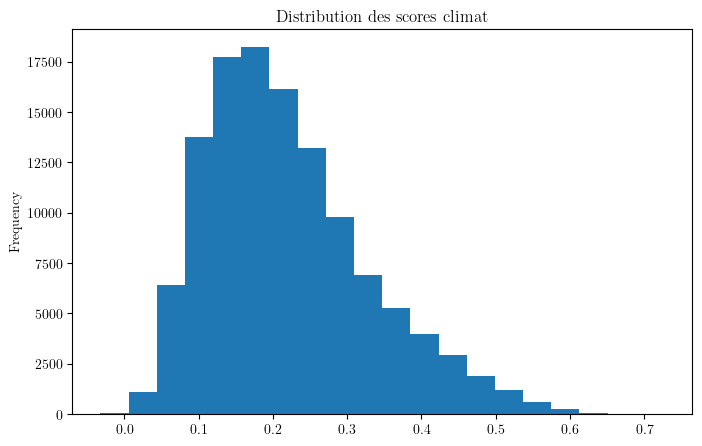

In [180]:
df['climate_score'] = pd.to_numeric(df['climate_score'], errors='coerce')

df['climate_score'].plot(kind='hist', bins=20, title="Distribution des scores climat", figsize=(8, 5))


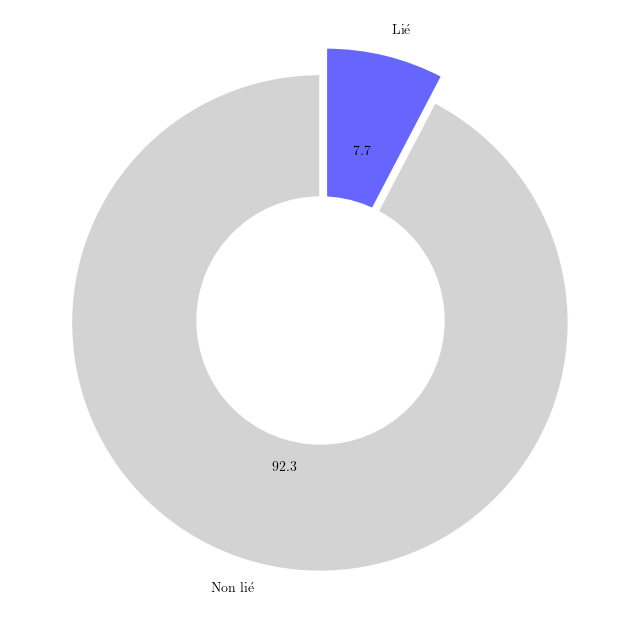

In [ ]:
import matplotlib.pyplot as plt

# Exemple df avec la colonne is_climate_related
# df = ...

counts = df['is_climate_related'].value_counts().sort_index()
labels = ['Non lié', 'Lié']

colors = ['lightgray', '#6666ff']  # correspondance aux couleurs sobres/type du code précédent

fig, ax = plt.subplots(figsize=(7,7))

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.01, 0.1),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.5, color='white', fc='white', linewidth=0)
ax.add_artist(centre_circle)

plt.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()


frameworkProgramme
FP9    35105
FP7    25020
FP8    17181
FP5    11696
FP4    11149
FP6     9615
FP3     4073
FP2     3003
FP1     2620
Name: count, dtype: int64


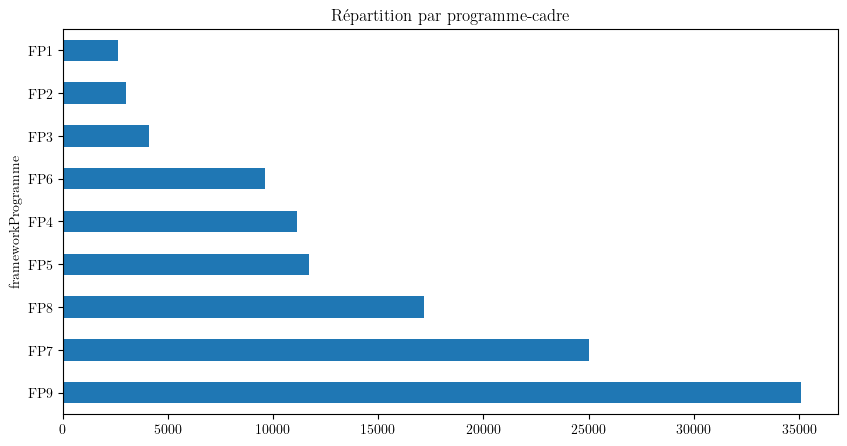

In [179]:
df['frameworkProgramme'].value_counts().plot(kind='barh', figsize=(10, 5), title="Répartition par programme-cadre")
print(df['frameworkProgramme'].value_counts())

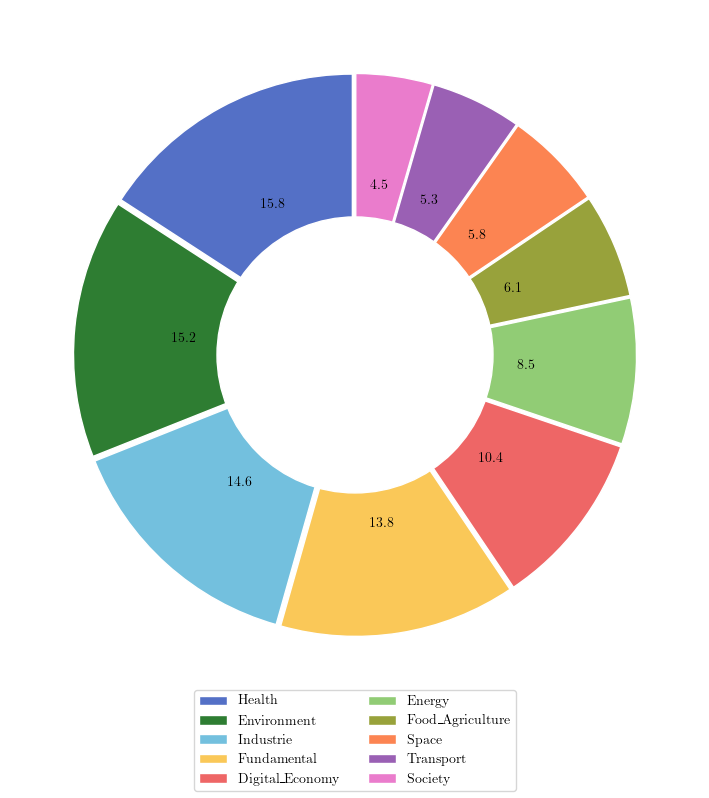

In [ ]:
counts = df['type_de_projet'].value_counts()
labels = counts.index.tolist()

# Construction des couleurs en utilisant le dictionnaire u.color_dict
colors = [u.color_dict.get(label, "#cccccc") for label in labels]  # gris clair par défaut si clé manquante

fig, ax = plt.subplots(figsize=(8,8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}% ({val})"
    return my_autopct

wedges, texts, autotexts = ax.pie(
    counts,
    labels=None,
    autopct=make_autopct(counts),
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    explode=[0.02]*len(counts)
)

centre_circle = plt.Circle((0,0), 0.5, color='white')
ax.add_artist(centre_circle)

fig.legend(wedges, labels, loc='lower center', ncol=2, fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 1])
# plt.savefig("./exports/domain_repartition.pdf")

plt.show()


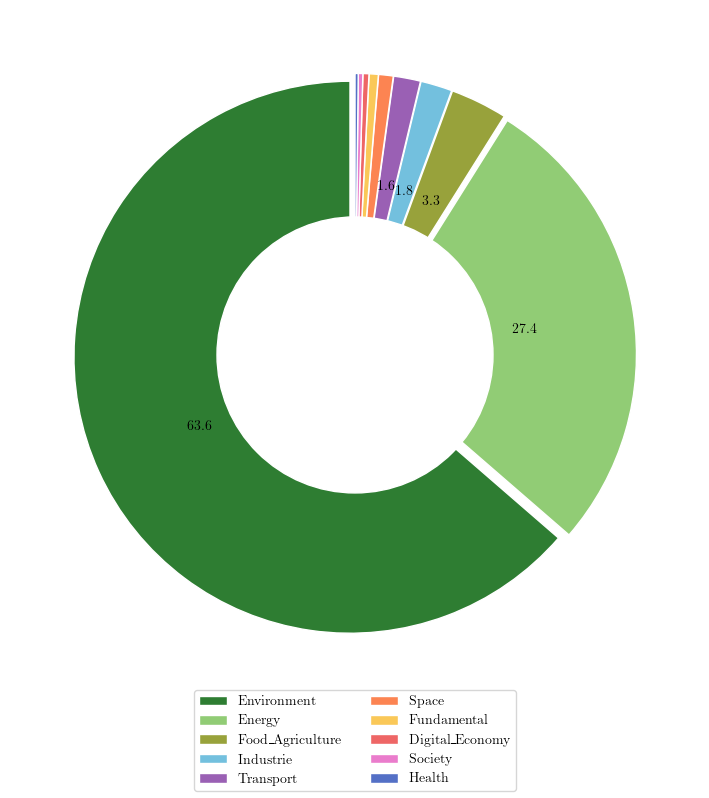

In [ ]:
# Filtrer les projets liés au climat
df_climate = df[df['is_climate_related']]

counts = df_climate['type_de_projet'].value_counts()
labels = counts.index.tolist()

# Utiliser le dictionnaire de couleurs défini dans utils.py
colors = [u.color_dict.get(label, "#cccccc") for label in labels]  # couleur par défaut si catégorie inconnue

fig, ax = plt.subplots(figsize=(8, 8))

# Liste des catégories pour lesquelles on affiche l'autopct
labels_to_show_pct = ["Environment", "Energy", "Food_Agriculture", "Industrie", "Transport"]

def make_autopct(values, labels_to_show):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        try:
            i = list(values).index(val)
        except ValueError:
            i = -1
        label = labels[i] if i >= 0 else None

        if label in labels_to_show:
            return f"{pct:.1f}% ({val})"
        else:
            return ""
    return my_autopct

wedges, texts, autotexts = ax.pie(
    counts,
    labels=None,
    autopct=make_autopct(counts, labels_to_show_pct),
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    explode=[0.02] * len(counts)
)

# Cercle blanc au centre pour effet donut
centre_circle = plt.Circle((0, 0), 0.5, color='white')
ax.add_artist(centre_circle)

fig.legend(wedges, labels, loc='lower center', ncol=2, fontsize=10)

plt.tight_layout(rect=[0, 0.1, 1, 1])
# plt.savefig("./exports/repartition_projets_climat_par_domaine.pdf")
plt.show()


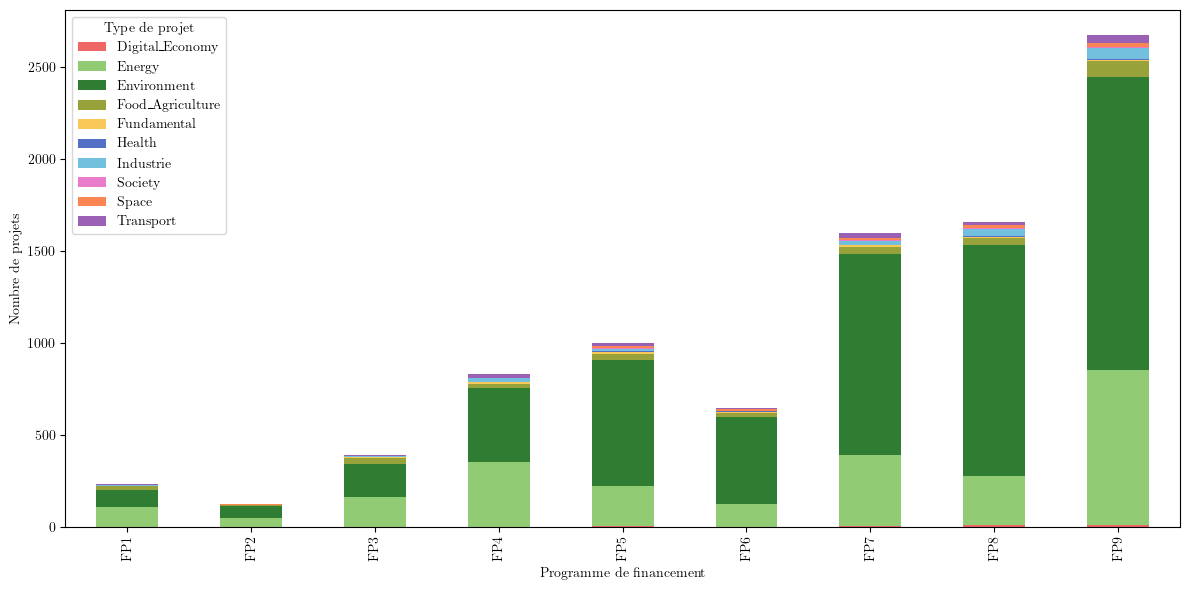

In [ ]:
df_climate = df[df["is_climate_related"] == True]
df_count = df_climate.groupby(['frameworkProgramme', 'type_de_projet']).size().reset_index(name='count')
pivot_df = df_count.pivot(index='frameworkProgramme', columns='type_de_projet', values='count').fillna(0)

# Réorganiser les couleurs selon l'ordre des colonnes
ordered_labels = pivot_df.columns.tolist()
colors = [u.color_dict.get(label, "#cccccc") for label in ordered_labels]

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.ylabel('Nombre de projets')
plt.xlabel('Programme de financement')
plt.legend(title='Type de projet')
plt.tight_layout()
# plt.savefig("./exports/project_number_by_domain_byFP.pdf")
plt.show()


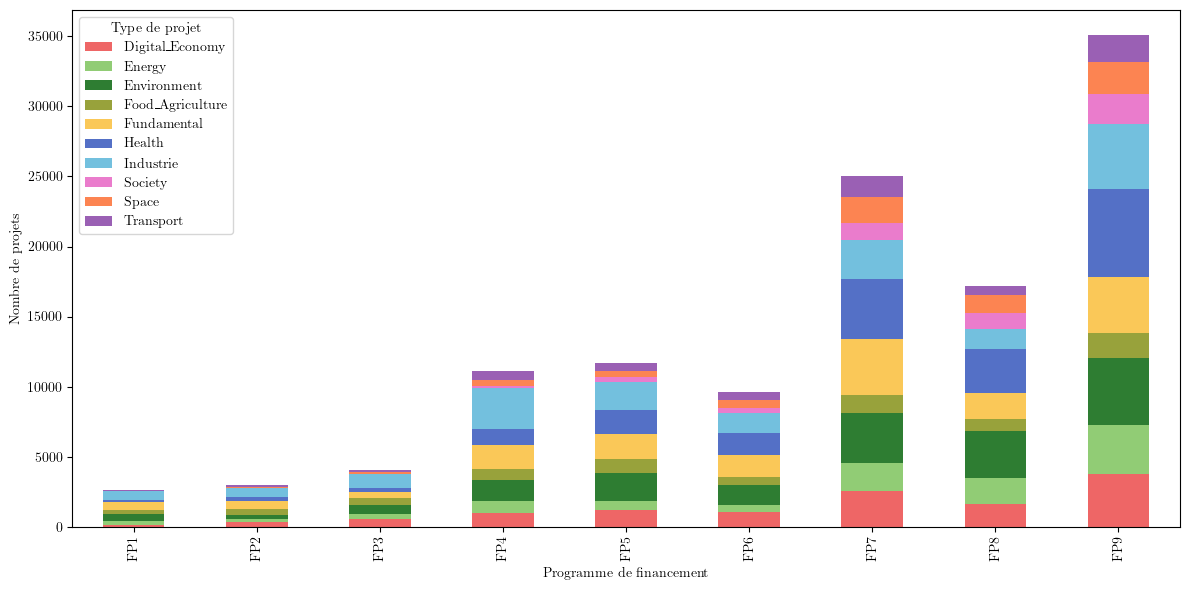

In [ ]:
df_count = df.groupby(['frameworkProgramme', 'type_de_projet']).size().reset_index(name='count')
pivot_df = df_count.pivot(index='frameworkProgramme', columns='type_de_projet', values='count').fillna(0)

# Réorganiser les couleurs selon l'ordre des colonnes
ordered_labels = pivot_df.columns.tolist()
colors = [u.color_dict.get(label, "#cccccc") for label in ordered_labels]

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.ylabel('Nombre de projets')
plt.xlabel('Programme de financement')
plt.legend(title='Type de projet')
plt.tight_layout()
# plt.savefig("./exports/project_number_by_domain.pdf")
plt.show()


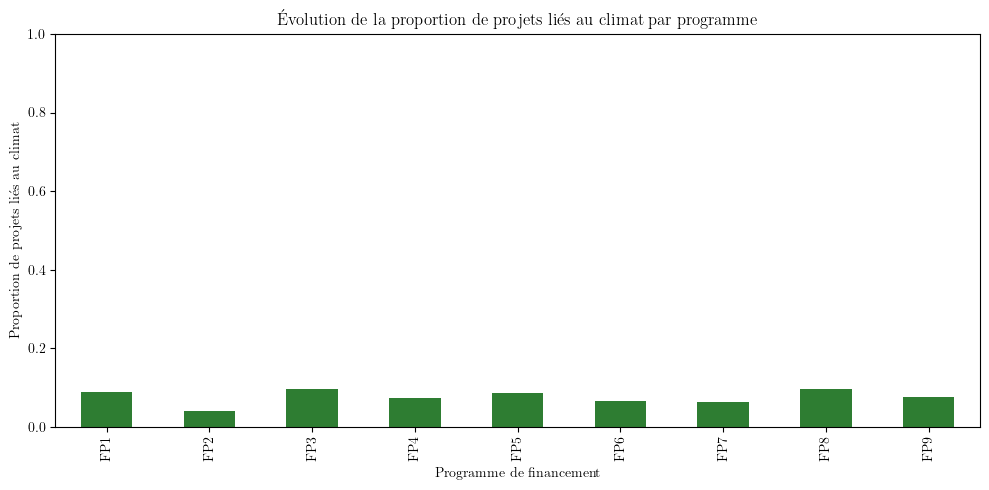

In [186]:
# Calcul de la proportion de projets liés au climat par programme
climate_ratio = df.groupby("frameworkProgramme")["is_climate_related"].mean()

# Affichage en barres
climate_ratio.plot(kind="bar", color="#2E7D32", figsize=(10, 5))  # vert forêt
plt.ylabel("Proportion de projets liés au climat")
plt.xlabel("Programme de financement")
plt.ylim(0, 1)  # Pour une échelle proportionnelle
plt.title("Évolution de la proportion de projets liés au climat par programme")
plt.tight_layout()
plt.show()


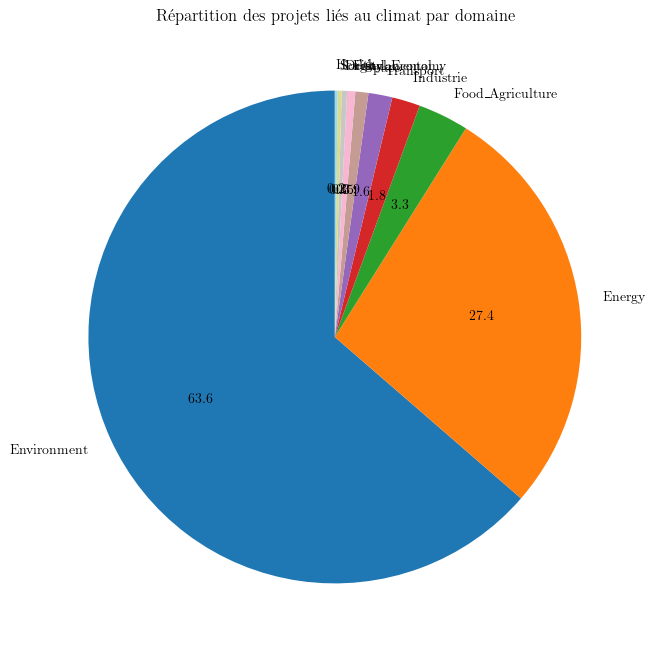

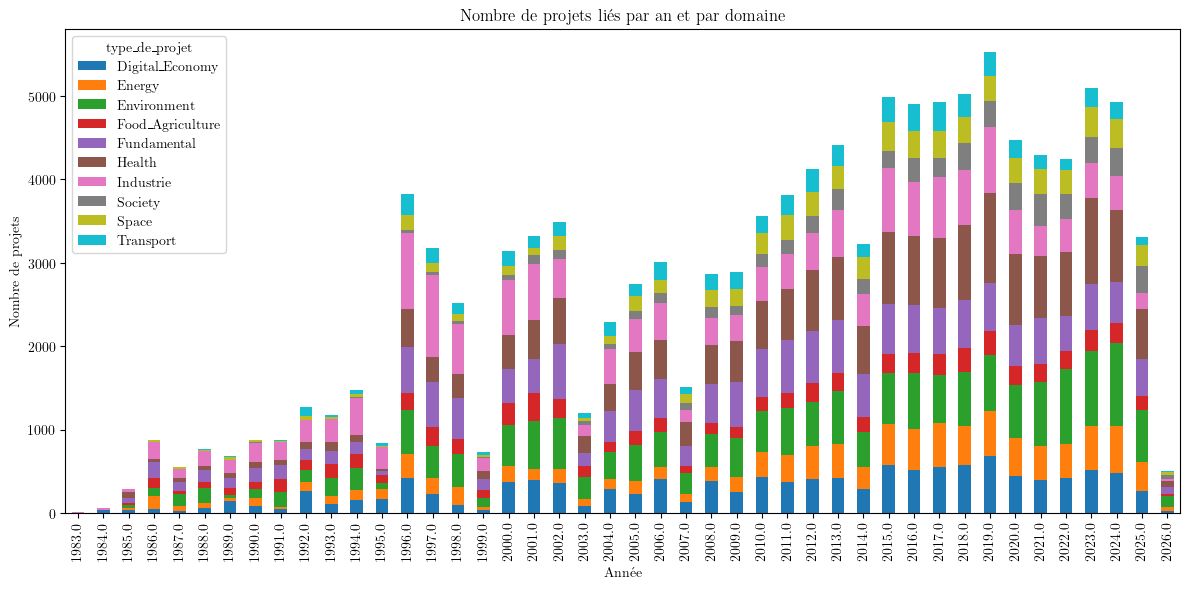

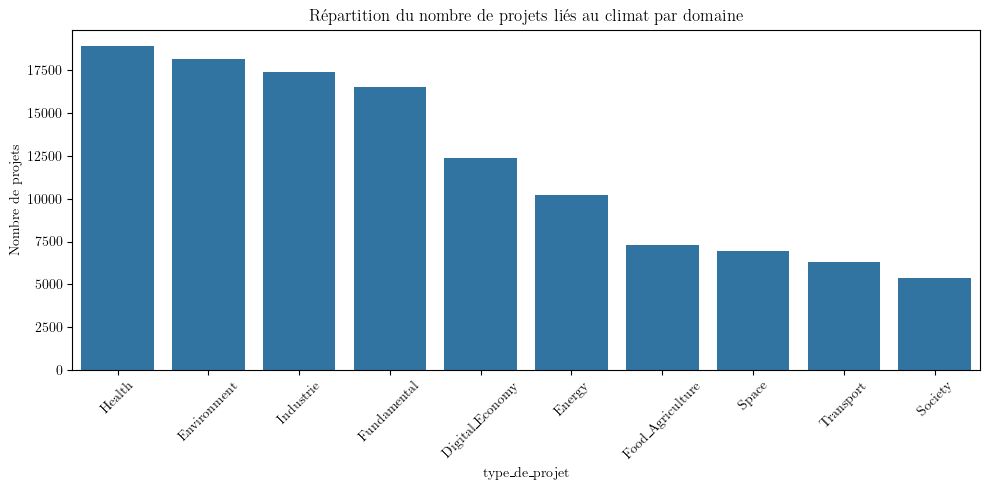

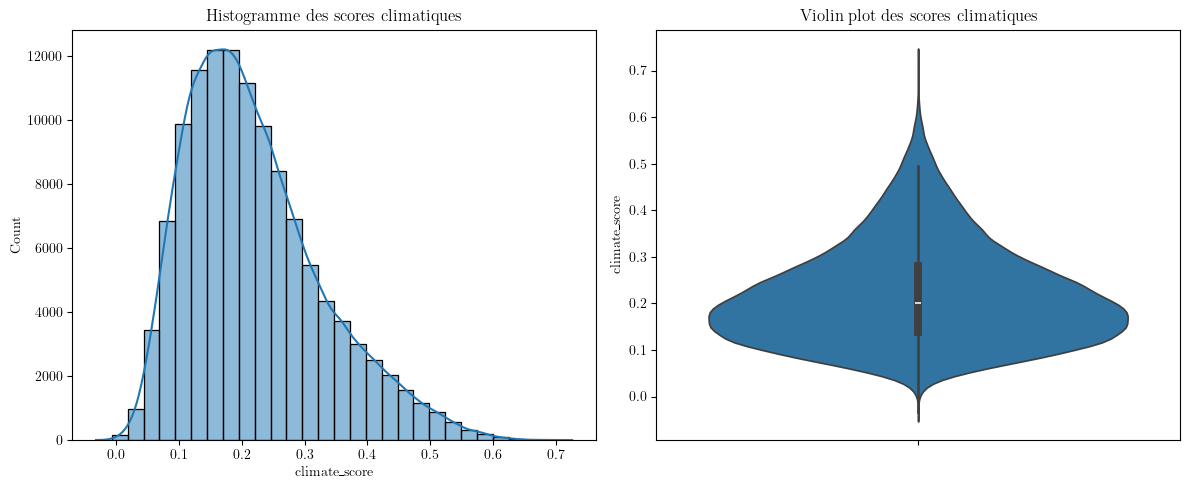

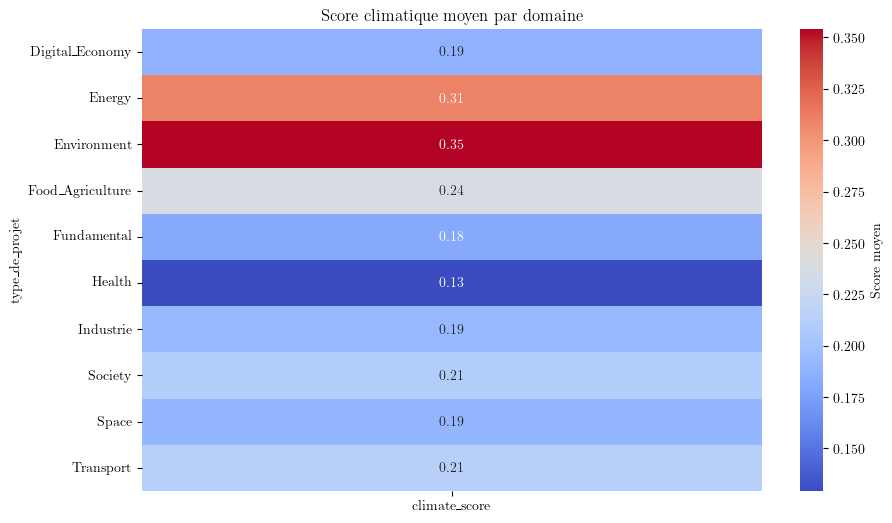

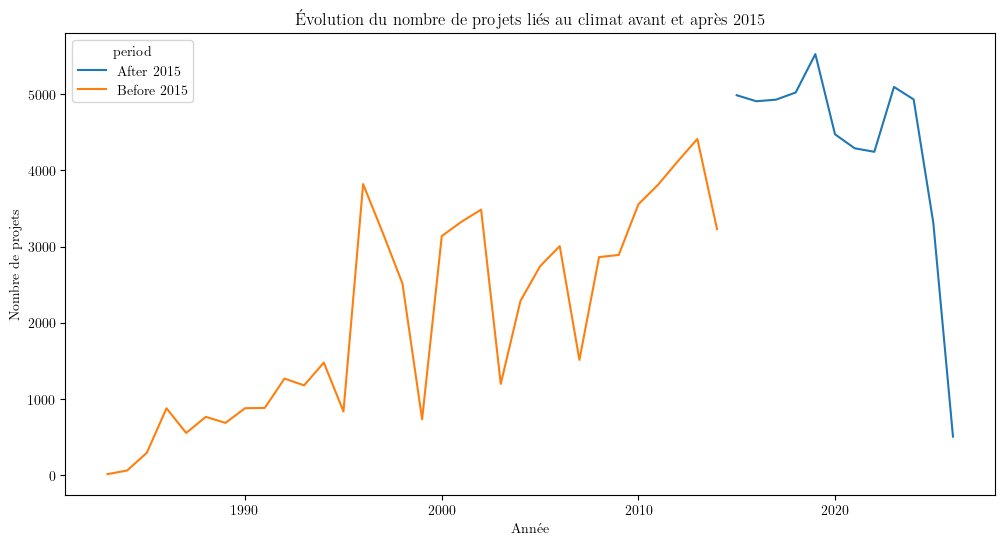

In [ ]:
df_climate = df[df['is_climate_related']]


# Compter le nombre de projets par domaine
counts = df_climate['type_de_projet'].value_counts()

# Afficher le camembert
plt.figure(figsize=(8,8))
counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title("Répartition des projets liés au climat par domaine")
plt.ylabel('')  # Pour enlever le label y
plt.show()

# --- 1. Nombre de projets liés par an et par domaine (barres empilées) ---
df_count = df.groupby(['year', 'type_de_projet']).size().reset_index(name='count')
pivot_df = df_count.pivot(index='year', columns='type_de_projet', values='count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Nombre de projets liés par an et par domaine')
plt.ylabel('Nombre de projets')
plt.xlabel('Année')
plt.legend(title='type_de_projet')
plt.tight_layout()
plt.show()

# --- 2. Répartition globale des projets liés au climat par domaine (barres) ---
domain_counts = df['type_de_projet'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=domain_counts.index, y=domain_counts.values)
plt.title('Répartition du nombre de projets liés au climat par domaine')
plt.xticks(rotation=45)
plt.ylabel('Nombre de projets')
plt.tight_layout()
plt.show()

# --- 3. Distribution des scores “climate_score” (histogramme et violin) ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['climate_score'], bins=30, kde=True)
plt.title('Histogramme des scores climatiques')

plt.subplot(1,2,2)
sns.violinplot(y=df['climate_score'])
plt.title('Violin plot des scores climatiques')
plt.tight_layout()
plt.show()


mean_scores = df.groupby('type_de_projet')['climate_score'].mean().reset_index()
mean_scores_pivot = mean_scores.pivot_table(index='type_de_projet', values='climate_score')

plt.figure(figsize=(10,6))
sns.heatmap(mean_scores_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Score moyen'})
plt.title('Score climatique moyen par domaine')
plt.show()


df['period'] = df['year'].apply(lambda y: 'Before 2015' if y < 2015 else 'After 2015')
period_counts = df.groupby(['period', 'year']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=period_counts, x='year', y='count', hue='period')
plt.title('Évolution du nombre de projets liés au climat avant et après 2015')
plt.ylabel('Nombre de projets')
plt.xlabel('Année')
plt.show()



In [187]:
summary = df.groupby("frameworkProgramme")["is_climate_related"].agg(
    total_projects='count',
    climate_related_projects='sum',
    proportion='mean'
)
print(summary)

                    total_projects  climate_related_projects  proportion
frameworkProgramme                                                      
FP1                           2620                       232    0.088550
FP2                           3003                       126    0.041958
FP3                           4073                       393    0.096489
FP4                          11149                       832    0.074626
FP5                          11696                      1001    0.085585
FP6                           9615                       649    0.067499
FP7                          25020                      1599    0.063909
FP8                          17181                      1655    0.096327
FP9                          35105                      2675    0.076200


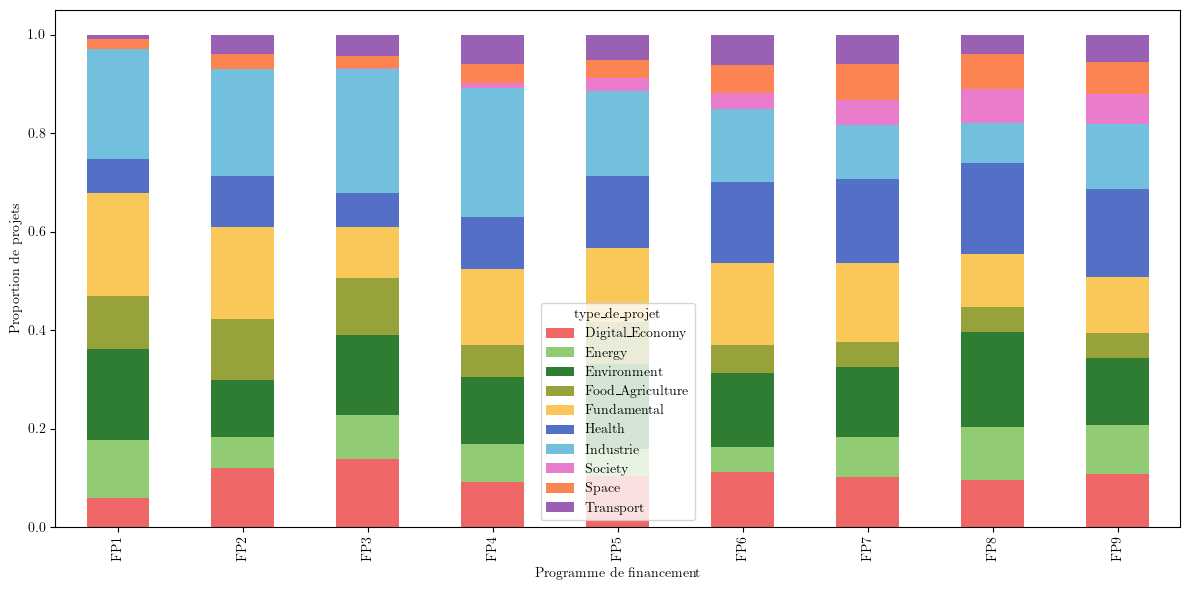

In [35]:
df_count = df.groupby(['frameworkProgramme', 'type_de_projet']).size().reset_index(name='count')

pivot_df = df_count.pivot(index='frameworkProgramme', columns='type_de_projet', values='count').fillna(0)

proportion_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

ordered_labels = proportion_df.columns.tolist()
colors = [u.color_dict.get(label, "#cccccc") for label in ordered_labels]

proportion_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.ylabel('Proportion de projets')
plt.xlabel('Programme de financement')
# plt.legend(title='Type de projet', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


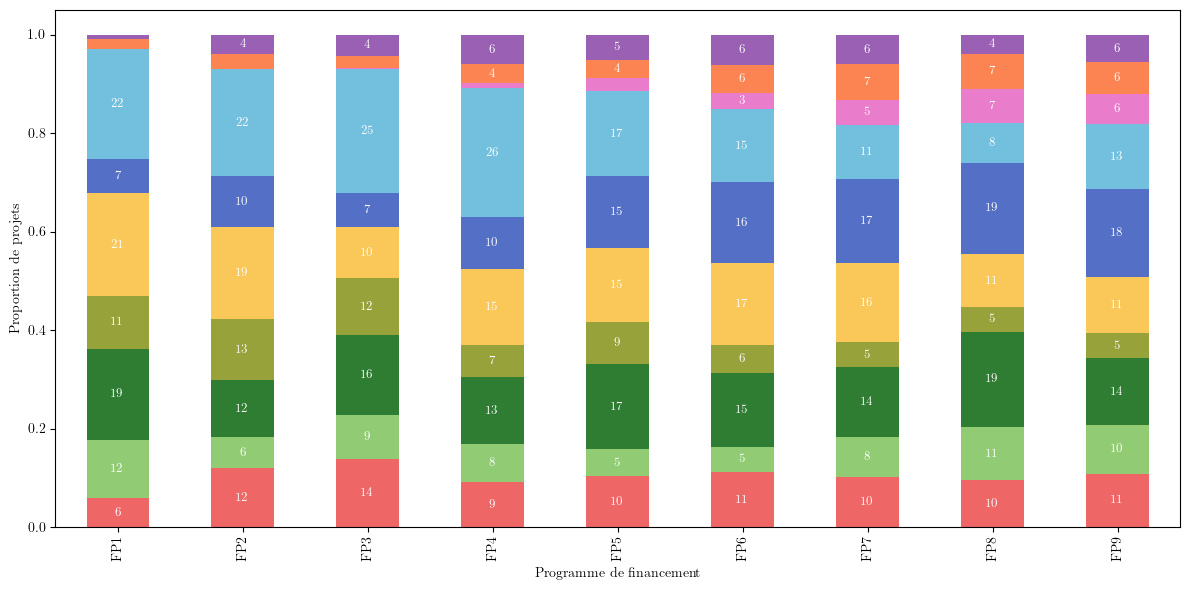

In [ ]:
df_count = df.groupby(['frameworkProgramme', 'type_de_projet']).size().reset_index(name='count')
pivot_df = df_count.pivot(index='frameworkProgramme', columns='type_de_projet', values='count').fillna(0)

proportion_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)
ordered_labels = proportion_df.columns.tolist()
colors = [u.color_dict.get(label, "#cccccc") for label in ordered_labels]

ax = proportion_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.ylabel('Proportion de projets')
plt.xlabel('Programme de financement')
# plt.legend(title='Type de projet', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, prog in enumerate(proportion_df.index):
    cum_sum = 0
    for j, col in enumerate(proportion_df.columns):
        val = proportion_df.loc[prog, col]
        if val > 0.03:  
            ax.text(i, cum_sum + val / 2, f"{val:.0%}", ha='center', va='center', color='white', fontsize=9)
        cum_sum += val

ax.legend().remove()
plt.tight_layout()
# plt.savefig("./exports/repartition_domaine_byFP.pdf")
plt.show()


In [40]:
df.to_csv("FP_v3.csv")